In [20]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix


In [14]:
# Configuration options
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 2.0 
frac_test_split = 0.33
num_features_for_samples = 2 
num_samples_total = 1000

In [15]:
# Generate data
inputs, targets = make_blobs(n_samples=num_samples_total,
                             centers=centers,
                             n_features=num_features_for_samples,
                             cluster_std=cluster_std)

X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=frac_test_split, random_state=blobs_random_seed)


In [16]:
np.save('./data.npy', (X_train, X_test, y_train, y_test))
X_train, X_test, y_train, y_test = np.load('./data.npy', allow_pickle=True)


d:\Kuliah\SEM_5\KK\20163_Afdal\env\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


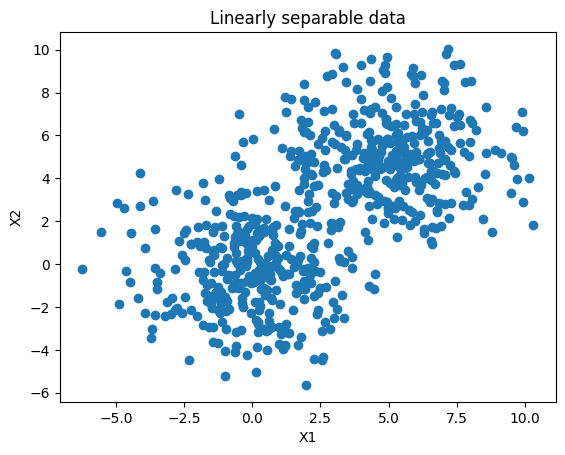

In [17]:
# Generate scatter plot for training data
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [19]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)

#Starts the training process
clf = clf.fit(X_train, y_train)

# Predict the test set
predictions = clf.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, predictions)))


Model accuracy score with default hyperparameters: 0.9636


d:\Kuliah\SEM_5\KK\20163_Afdal\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


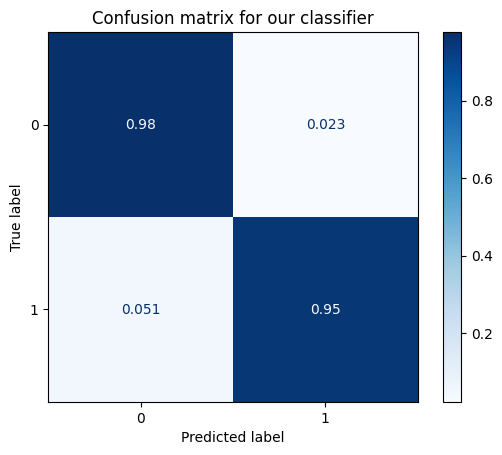

In [21]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                               cmap=plt.cm.Blues,
                               normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()


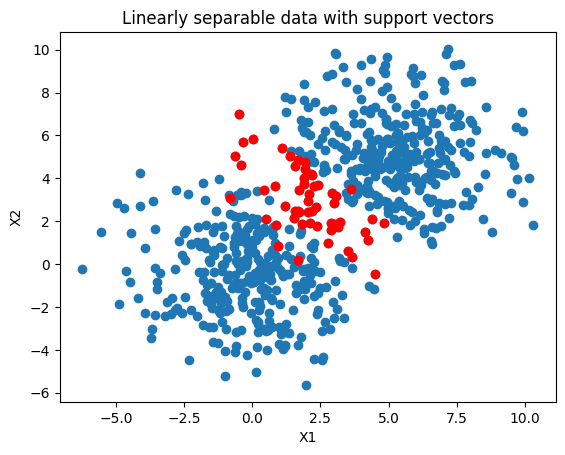

In [22]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [23]:
#Start the training process using polynomial Kernel and C=100.0
poly_svc = svm.SVC(kernel='poly', C=100.0)

# fit classifier to training set
poly_svc.fit(X_train, y_train)

# make predictions on test set
y_pred = poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.9545


d:\Kuliah\SEM_5\KK\20163_Afdal\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


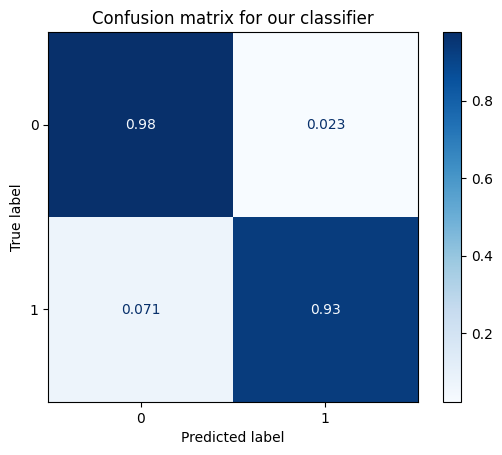

In [24]:
# Generate confusion matrix
matrix = plot_confusion_matrix(poly_svc, X_test, y_test,
                               cmap=plt.cm.Blues,
                               normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()


In [25]:
# instantiate classifier with sigmoid kernel and C=1000.0
sigmoid_svc = svm.SVC(kernel='sigmoid', C=1000.0)

# fit classifier to training set
sigmoid_svc.fit(X_train, y_train)

# make predictions on test set
y_pred = sigmoid_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(
    accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.7424


d:\Kuliah\SEM_5\KK\20163_Afdal\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


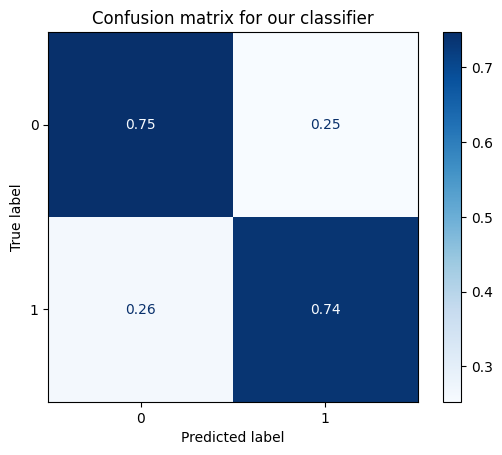

In [26]:
# Generate confusion matrix
matrix = plot_confusion_matrix(sigmoid_svc, X_test, y_test,
                               cmap=plt.cm.Blues,
                               normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()


### Kesimpulan
> Didapatkan akurasi paling tinggi yaitu menggunakan kernel linear dengan C = 1 yaitu 96.36%